In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import pandas_profiling
from pysqldf import SQLDF

In [2]:
data = pd.read_csv('EL Data Analyst Assessment Data VTMS Report.csv')

/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data.profile_report(title='VTMS Dataset')

## The scope of the problem – How often are VTMS communication failures occurring?

- data shows the Communication failure occures about 0.4% of all the observations

Now we wanna know Which locations are suffering the most communication failures and
how frequently are these locations suffering communication failures.

In [105]:
data_comm_fail = data[data['VTMS_Status'] == 'Communication failure']

In [19]:
data_comm_fail.profile_report(title='VTMS Communication Failures Dataset')

## Specific problem areas – Which locations are suffering the most communication failures and how frequently are these locations suffering communication failures?

### Locations suffer the most communication failures are:
   * 3130 - __Crow Canyon SB__ - communication fails 238 times - 42.3%
   * 3230 - __Crow Canyon NB__ - communication fails 125 times - 22.2%
   * 3160 - __Alcosta__ - communication fails 121 times - 21.5%
   * 3260 - __Livorna__ - communication fails 79 times - 14.0%

In [33]:
pd.to_datetime('3/29/2019 7:19').day

29

In [106]:
data_comm_fail['dtMsgStartTime2'] = pd.to_datetime(data_comm_fail['dtMsgStartTime2'])

/miniconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
data_comm_fail.head()

dtMsgStartTime2               siZoneID  iPlazaID Zone_Toll  \
4122  2019-03-01 19:02:00  3230 - Crow Canyon NB  4200 - 2       0.5   
11917 2019-03-03 07:19:00  3130 - Crow Canyon SB  4113 - 1             
11918 2019-03-03 07:19:00  3130 - Crow Canyon SB  4112 - 2             
11919 2019-03-03 07:19:00  3130 - Crow Canyon SB  4110 - 4             
11920 2019-03-03 07:19:00  3130 - Crow Canyon SB  4109 - 5             

      Segment_Toll   General_Message VTMS_Control            VTMS_Status  \
4122          2.75  FASTRAK REQUIRED           LC  Communication failure   
11917                    OPEN TO ALL           LC  Communication failure   
11918                    OPEN TO ALL           LC  Communication failure   
11919                    OPEN TO ALL           LC  Communication failure   
11920                    OPEN TO ALL           LC  Communication failure   

                            Lane_Mode PricingType TimeMessageSent  \
4122     I-680NB CCNB Dynamic Pricing    Historic        19:02:42   
11917  I-680 SB Non-Tolling (Weekend)    Historic         7:19:40   
11918  I-680 SB Non-Tolling (Weekend)    Historic         7:19:30   
11919  I-680 SB Non-Tolling (Weekend)    Historic         7:19:55   
11920  I-680 SB Non-Tolling (Weekend)    Historic         7:19:57   

      TimeMessageAck LM_Override VTMS_Override            Message_Set  
4122        19:02:42          No            No       Fastrak Required  
11917        7:19:40          No            No  Non-Tolling (Weekend)  
11918        7:19:30          No            No  Non-Tolling (Weekend)  
11919        7:19:55          No            No  Non-Tolling (Weekend)  
11920        7:19:57          No            No  Non-Tolling (Weekend)

In [107]:
data_comm_fail = data_comm_fail.drop(columns=['VTMS_Status', 'VTMS_Override', 'VTMS_Control', 'PricingType', 'LM_Override', 'TimeMessageSent', 'TimeMessageAck'])

In [108]:
data_comm_fail = data_comm_fail.reset_index(drop=True)

In [109]:
data_comm_fail = data_comm_fail.replace(r'^\s*$', np.nan, regex=True)

In [88]:
data_comm_fail.profile_report(title='VTMS Communication Failures Dataset (Cleaned)')

/miniconda3/lib/python3.7/site-packages/pandas_profiling/model/correlations.py:34: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))


In [113]:
data_comm_fail['hour'] = [d.hour for d in data_comm_fail['dtMsgStartTime2']]
data_comm_fail['day'] = [d.day for d in data_comm_fail['dtMsgStartTime2']]

In [119]:
count_day_df = data_comm_fail.groupby('day').count()
count_hour_df = data_comm_fail.groupby('hour').count()

In [184]:
count_day_df

dtMsgStartTime2  siZoneID  iPlazaID  Zone_Toll  Segment_Toll  \
day                                                                 
1                  1         1         1          1             1   
3                127       127       127          0             0   
4                  2         2         2          2             1   
6                  6         6         6          6             3   
7                  5         5         5          5             3   
8                  8         8         8          8             7   
10               298       298       298          0             0   
11                 1         1         1          1             0   
12                 2         2         2          2             2   
13                14        14        14         14            10   
14                10        10        10         10             9   
15                15        15        15         15            10   
18                13        13        13         13             7   
19                15        15        15         15             9   
21                 6         6         6          5             3   
22                10        10        10         10             7   
25                 4         4         4          4             2   
26                 9         9         9          9             6   
27                 6         6         6          6             6   
29                11        11        11         11             5   

     General_Message  Lane_Mode  Message_Set  hour  
day                                                 
1                  1          1            1     1  
3                127        127          127   127  
4                  2          2            2     2  
6                  6          6            6     6  
7                  5          5            5     5  
8                  8          8            8     8  
10               298        298          298   298  
11                 1          1            1     1  
12                 2          2            2     2  
13                14         14           14    14  
14                10         10           10    10  
15                15         15           15    15  
18                13         13           13    13  
19                15         15           15    15  
21                 6          6            6     6  
22                10         10           10    10  
25                 4          4            4     4  
26                 9          9            9     9  
27                 6          6            6     6  
29                11         11           11    11

In [185]:
count_hour_df

dtMsgStartTime2  siZoneID  iPlazaID  Zone_Toll  Segment_Toll  \
hour                                                                 
0                 134       134       134          0             0   
1                 137       137       137          0             0   
3                  27        27        27          0             0   
6                  13        13        13         13            11   
7                 104       104       104          5             3   
8                  35        35        35          7             6   
9                  20        20        20         20            14   
10                  1         1         1          1             1   
11                 10        10        10         10             7   
12                 16        16        16         16             8   
13                  2         2         2          2             1   
14                  1         1         1          1             1   
15                 29        29        29         29            19   
17                  4         4         4          4             2   
18                 25        25        25         25            16   
19                  4         4         4          4             2   
23                  1         1         1          0             0   

      General_Message  Lane_Mode  Message_Set  day  
hour                                                
0                 134        134          134  134  
1                 137        137          137  137  
3                  27         27           27   27  
6                  13         13           13   13  
7                 104        104          104  104  
8                  35         35           35   35  
9                  20         20           20   20  
10                  1          1            1    1  
11                 10         10           10   10  
12                 16         16           16   16  
13                  2          2            2    2  
14                  1          1            1    1  
15                 29         29           29   29  
17                  4          4            4    4  
18                 25         25           25   25  
19                  4          4            4    4  
23                  1          1            1    1

Text(0.5, 1.0, 'Number of Communication Failures Per Day in March 2019')

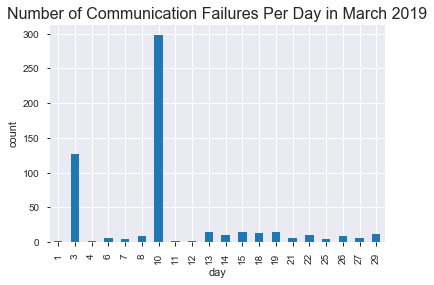

In [181]:
count_day_df['dtMsgStartTime2'].plot.bar()
plt.ylabel('count')
plt.title('Number of Communication Failures Per Day in March 2019', fontsize=16)

Text(0.5, 1.0, 'Number of Communication Failures Per hour in March 2019')

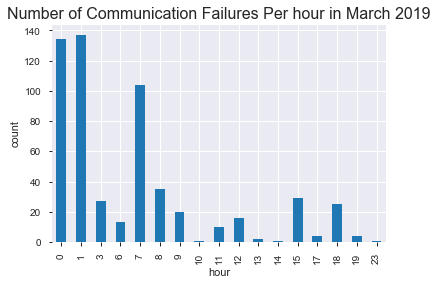

In [182]:
count_hour_df['dtMsgStartTime2'].plot.bar()
plt.ylabel('count')
plt.title('Number of Communication Failures Per hour in March 2019', fontsize=16)

Now we investigate in how communication failures are distributed on locations (Crow Canyon SB, Crow Canyon NB, Alcosta and Livorna) in terms of days and hours that the failures appear the most

In [319]:
data_comm_fail_loc_hr = data_comm_fail[['siZoneID', 'hour']]
data_comm_fail_loc_day.head()

siZoneID  hour
0  3230 - Crow Canyon NB    19
1  3130 - Crow Canyon SB     7
2  3130 - Crow Canyon SB     7
3  3130 - Crow Canyon SB     7
4  3130 - Crow Canyon SB     7

In [320]:
data_comm_fail_loc_hr_top3 = data_comm_fail_loc_hr[data_comm_fail_loc_hr['hour'].isin([0,1,7])]

In [321]:
data_comm_fail_loc_hr_top3.describe()

hour
count  375.000000
mean     2.306667
std      2.942285
min      0.000000
25%      0.000000
50%      1.000000
75%      7.000000
max      7.000000

In [283]:
data_comm_fail_loc_hr_top3_gb = data_comm_fail_loc_hr_top3.groupby(['siZoneID', 'hour']).agg({'hour': np.size})

In [284]:
data_comm_fail_loc_hr_top3_gb.shape

(12, 1)

In [285]:
data_comm_fail_loc_hr_top3_gb

hour
siZoneID              hour      
3130 - Crow Canyon SB 0       57
                      1       58
                      7       44
3160 - Alcosta        0       28
                      1       32
                      7       23
3230 - Crow Canyon NB 0       30
                      1       27
                      7       22
3260 - Livorna        0       19
                      1       20
                      7       15

In [296]:
data_comm_fail_loc_hr_top3_gb_copy = data_comm_fail_loc_hr_top3_gb.copy()

In [297]:
data_comm_fail_loc_hr_top3_gb_copy = data_comm_fail_loc_hr_top3_gb_copy.rename(columns={'hour':'count'})

In [298]:
data_comm_fail_loc_hr_top3_gb_copy

count
siZoneID              hour       
3130 - Crow Canyon SB 0        57
                      1        58
                      7        44
3160 - Alcosta        0        28
                      1        32
                      7        23
3230 - Crow Canyon NB 0        30
                      1        27
                      7        22
3260 - Livorna        0        19
                      1        20
                      7        15

In [299]:
data_comm_fail_loc_hr_top3_gb_copy.reset_index(level=0, inplace=True)

In [300]:
data_comm_fail_loc_hr_top3_gb_copy

siZoneID  count
hour                              
0     3130 - Crow Canyon SB     57
1     3130 - Crow Canyon SB     58
7     3130 - Crow Canyon SB     44
0            3160 - Alcosta     28
1            3160 - Alcosta     32
7            3160 - Alcosta     23
0     3230 - Crow Canyon NB     30
1     3230 - Crow Canyon NB     27
7     3230 - Crow Canyon NB     22
0            3260 - Livorna     19
1            3260 - Livorna     20
7            3260 - Livorna     15

In [301]:
data_comm_fail_loc_hr_top3_gb_copy['hour'] = data_comm_fail_loc_hr_top3_gb_copy.index

In [308]:
data_comm_fail_loc_hr_top3_gb_copy

siZoneID  count  hour
hour                                    
0     3130 - Crow Canyon SB     57     0
1     3130 - Crow Canyon SB     58     1
7     3130 - Crow Canyon SB     44     7
0            3160 - Alcosta     28     0
1            3160 - Alcosta     32     1
7            3160 - Alcosta     23     7
0     3230 - Crow Canyon NB     30     0
1     3230 - Crow Canyon NB     27     1
7     3230 - Crow Canyon NB     22     7
0            3260 - Livorna     19     0
1            3260 - Livorna     20     1
7            3260 - Livorna     15     7

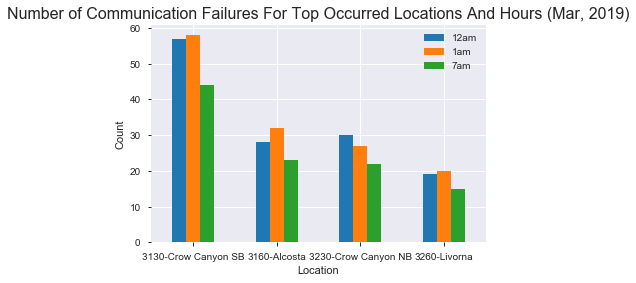

In [337]:
hr_count_12am = [57, 28, 30, 19]
hr_count_1am = [58, 32, 27, 20]
hr_count_7am = [44, 23, 22, 15]
location = ['3130-Crow Canyon SB', '3160-Alcosta', '3230-Crow Canyon NB', '3260-Livorna']
hrs = ['12am', '1am', '7am']

df_loc_hr_ct = pd.DataFrame(np.c_[hr_count_12am,hr_count_1am,hr_count_7am], index=location)
df_loc_hr_ct.plot.bar(rot=0)
plt.legend(hrs)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Number of Communication Failures For Top Occurred Locations And Hours (Mar, 2019)',fontsize=16)
plt.show()

In [322]:
data_comm_fail_loc_day = data_comm_fail[['siZoneID', 'day']]
data_comm_fail_loc_day.head()

siZoneID  day
0  3230 - Crow Canyon NB    1
1  3130 - Crow Canyon SB    3
2  3130 - Crow Canyon SB    3
3  3130 - Crow Canyon SB    3
4  3130 - Crow Canyon SB    3

In [323]:
data_comm_fail_loc_day_top2 = data_comm_fail_loc_day[data_comm_fail_loc_day['day'].isin([3,10])]

In [324]:
data_comm_fail_loc_day_top2.describe()

day
count  425.000000
mean     7.908235
std      3.207973
min      3.000000
25%      3.000000
50%     10.000000
75%     10.000000
max     10.000000

In [325]:
data_comm_fail_loc_day_top2_gb = data_comm_fail_loc_day_top2.groupby(['siZoneID', 'day']).agg({'day': np.size})

In [327]:
data_comm_fail_loc_day_top2_gb.shape

(8, 1)

In [328]:
data_comm_fail_loc_day_top2_gb

day
siZoneID              day     
3130 - Crow Canyon SB 3     54
                      10   127
3160 - Alcosta        3     28
                      10    65
3230 - Crow Canyon NB 3     27
                      10    63
3260 - Livorna        3     18
                      10    43

In [329]:
data_comm_fail_loc_day_top2_gb_copy = data_comm_fail_loc_day_top2_gb.copy()

In [330]:
data_comm_fail_loc_day_top2_gb_copy = data_comm_fail_loc_day_top2_gb_copy.rename(columns={'day':'count'})

In [331]:
data_comm_fail_loc_day_top2_gb_copy

count
siZoneID              day       
3130 - Crow Canyon SB 3       54
                      10     127
3160 - Alcosta        3       28
                      10      65
3230 - Crow Canyon NB 3       27
                      10      63
3260 - Livorna        3       18
                      10      43

In [332]:
data_comm_fail_loc_day_top2_gb_copy.reset_index(level=0, inplace=True)

In [333]:
data_comm_fail_loc_day_top2_gb_copy

siZoneID  count
day                              
3    3130 - Crow Canyon SB     54
10   3130 - Crow Canyon SB    127
3           3160 - Alcosta     28
10          3160 - Alcosta     65
3    3230 - Crow Canyon NB     27
10   3230 - Crow Canyon NB     63
3           3260 - Livorna     18
10          3260 - Livorna     43

In [334]:
data_comm_fail_loc_day_top2_gb_copy['day'] = data_comm_fail_loc_day_top2_gb_copy.index

In [335]:
data_comm_fail_loc_day_top2_gb_copy

siZoneID  count  day
day                                   
3    3130 - Crow Canyon SB     54    3
10   3130 - Crow Canyon SB    127   10
3           3160 - Alcosta     28    3
10          3160 - Alcosta     65   10
3    3230 - Crow Canyon NB     27    3
10   3230 - Crow Canyon NB     63   10
3           3260 - Livorna     18    3
10          3260 - Livorna     43   10

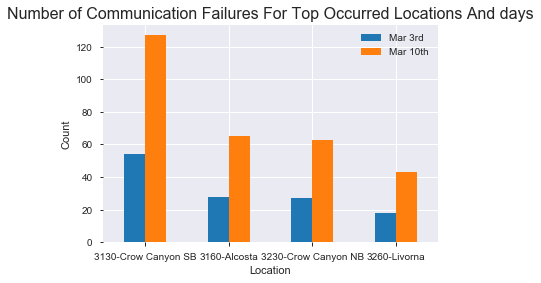

In [338]:
day_count_3rd = [54, 28, 27, 18]
day_count_10th = [127, 65, 63, 43]
location = ['3130-Crow Canyon SB', '3160-Alcosta', '3230-Crow Canyon NB', '3260-Livorna']
days = ['Mar 3rd', 'Mar 10th']

df_loc_day_ct = pd.DataFrame(np.c_[day_count_3rd,day_count_10th], index=location)
df_loc_day_ct.plot.bar(rot=0)
plt.legend(days)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Number of Communication Failures For Top Occurred Locations And days',fontsize=16)
plt.show()

## Identify patterns – Identify and document any patterns that emerge in your analysis.

* In all the communication failure cases,
    * __March 10th__ has the most failures - 298 count - 52.9%
    * __March 3rd__ has the second most failures - 127 count - 22.6%
    
* In all the communication failure cases,
    * __1 am__ has the most failures - 137 count - 24.3%
    * __12 am__ has the second most failures - 134 count - 23.8%
    * __7 am__ has the third most failures - 104 count - 18.5%

* In all the communication failure cases, variable General_Message has: 
    * __OPEN TO ALL__ - 426 count - 75.7%
    * __FASTRAK REQUIRED__ - 137 count - 24.3%

* In all the communication failure cases, variable Lane_Mode has: 
    * __I-680 SB Non-Tolling (Weekend)__ - 274 count - 48.7%
    * __I-680 NB Non-Tolling Weekend V2__ - 151 count - 26.8%
    * __Rest__ 

* In all the communication failure cases, variable Message_Set has: 
    * __Non-Tolling (Weekend)__ - 426 count - 75.7%
    * __Fastrak Required__	137 count - 24.3%

* In all the communication failure cases, variable Zone_Toll has: 
    * __Free__ 426 count - 75.7%
    * __0.5__ 76 count - 13.5%	
    * __Rest__
    
* In all the communication failure cases,
    * All __LM_Override__ = No
    * All __PricingType__ = Historic
    * All __VTMS_Control__ = LC
    * All __VTMS_Override__ = No